In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/youtube-sentiment-data/video_id_info.csv", on_bad_lines='skip')

/tmp/ipykernel_18/586718287.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/youtube-sentiment-data/video_id_info.csv", on_bad_lines='skip')


In [3]:
df.shape

(691400, 4)

In [4]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
df.tail()

,video_id,comment_text,likes,replies
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0


In [6]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [7]:
#drop null values
df.dropna(inplace=True)

In [8]:
df.shape

(691374, 4)

In [9]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 2)Performing Sentiment Analysis

In [10]:
#TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks.

!pip install textblob

import sys     #It's called "sys" because it provides access to system-specific parameters and functions.
!{sys.executable} -m pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [11]:
from textblob import TextBlob

In [12]:
# taking sample data size of 1000 data records only.
# creating a new DataFrame (sample_df) by selecting the first 1000 rows of an existing DataFrame (df).

sample_df = df[0:1000]

In [13]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [14]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️")      #gives a normal text.

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [15]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment    #checking the sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [16]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity     #checking polarity of the sentiment. So, in the output we got a neutral sentence.
                                                                  # -1: Negative, 0: Neutral, 1:Positive

0.0

In [17]:
#running a for-loop to check the sentiments of all the data records in comment_text column.
polarity =[]    #creating a blank list to store all the sentiment values that we will get from running the loop.
for comment in df['comment_text']:
  try:
    polarity.append(TextBlob(comment).sentiment.polarity)
  except:
      polarity.append(0)

In [18]:
len(polarity)

691374

In [19]:
df['polarity'] = polarity

In [20]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## 3)Wordcloud Analysis of Data

In [21]:
filter1 = df['polarity']==1
comments_positive = df[filter1]
df[filter1]

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [22]:
filter2 = df['polarity']==-1
comments_negative = df[filter2]
df[filter2]

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [23]:
!pip install wordcloud
import sys
!{sys.executable} -m pip install wordcloud

In [24]:
from wordcloud import WordCloud, STOPWORDS
#Stopwords are common words like "the," "is," and "and" that are often removed from text during analysis because they don't carry significant meaning.

In [25]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [26]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [27]:
type(df['comment_text'])

pandas.core.series.Series

In [28]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
# joins all the text data from the 'comment_text' column in the DataFrame 'comments_positive' into a single string, separated by spaces.
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [29]:
total_comments_positive

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [30]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

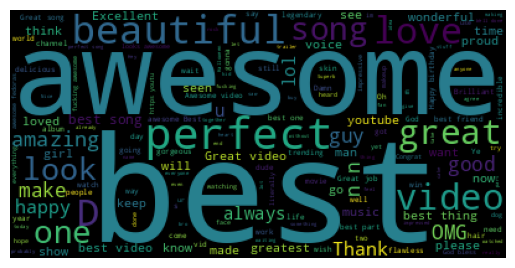

In [31]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

***Hence, some of the positive words are: awesome, best, love, great, perfect, beautiful, video, etc.***

In [32]:
total_comments_negative = ' '.join(comments_negative['comment_text'])
total_comments_negative

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

In [33]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

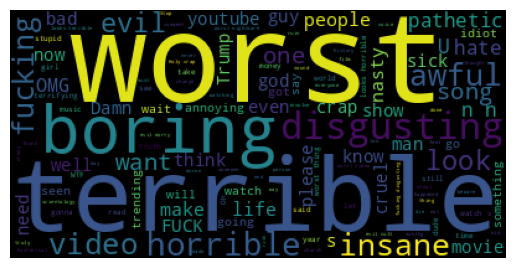

In [34]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

***Hence, some of the negative words are boring, worst, terrible, horrible, pathetic, cruel, insane, etc.***

## 4) Performing Emoji Analysis

In [35]:
!pip install emoji==2.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: emoji
    Found existing installation: emoji 2.12.1
    Uninstalling emoji-2.12.1:
      Successfully uninstalled emoji-2.12.1


In [36]:
import sys
!{sys.executable} -m pip install emoji==2.10.1

In [37]:
import emoji

In [38]:
emoji.__version__

'2.10.1'

In [39]:
comment = 'trending 😉'

In [40]:
#extracting emoji from the sentence
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [41]:
emo_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emo_list.append(char)

emo_list

['😉']

In [42]:
#iterating loop to extract all the emojis
all_emoji_list=[]
for comment in df['comment_text'].dropna():
  for char in comment:
    if char in emoji.EMOJI_DATA:
      all_emoji_list.append(char)

#Displaying only first 10 emojis. We can also display more emojis by not defining the size.
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

**Now we will check the frequency of each and every emoji.**

In [43]:
from collections import Counter

In [44]:
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [45]:
# checking frequency of the first emoji only
Counter(all_emoji_list).most_common(10)[0]

('😂', 36987)

In [46]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [47]:
Counter(all_emoji_list).most_common(10)[0][1]

36987

In [48]:
# checking frequency of the second emoji only
Counter(all_emoji_list).most_common(10)[1]

('😍', 33453)

In [49]:
#displaying only the emoji list containing all the emojis
emojis = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [50]:
freqs = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [51]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

In [52]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [53]:
trace = go.Bar(x=emojis, y=freqs)

# Create the figure
fig = go.Figure(data=[trace])

# Update layout with axis labels and x-tick label size
fig.update_layout(
    title='Emoji Frequency',
    xaxis_title='Emojis',
    yaxis_title='Frequency',
    xaxis=dict(
        tickfont=dict(size=20)
    )
)

# Show the figure
fig.show()